#IoT Machine Learning

###Imports

In [0]:
import requests 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from xgboost import XGBRegressor    
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from array import *
from pandas import DataFrame


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['array', 'typecodes', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


###Funciones

In [0]:
def agregar_datos_fecha(df,col):
    df["Dia_semanal"] = df[col].dt.dayofweek  #Día de la semana Lunes = 0; Domingo = 6
    df["Semana_anual"] = df[col].dt.week      #Semanas del 1 al 52
    df["Mes"] = df[col].dt.month              #Mes del 1 al 12
    df["Hora"] = df[col].dt.hour              #Hora
    df["Año"] = df[col].dt.year               #Year
    df["Dia"] = df[col].dt.day                #Day
    df["dia_del_año"] = df[col].dt.dayofyear  #Day of year
    #df["Minuto"] = df[col].dt.minute  
    return df

###Get token


In [0]:
# api-endpoint 
URLToken = "https://industrial.api.ubidots.com/api/v1.6/auth/token/"
  
# APIKey given here 
ubidotsAPIKey = "BBFF-e9e7fa61f82ed6528bc5a5d6e95584b5e55"
  
# defining a params dict for the parameters to be sent to the API 
HEADERS = {'x-ubidots-apikey':ubidotsAPIKey} 
  
# sending get request and saving the response as response object 
r = requests.post(url = URLToken, headers = HEADERS) 
  
# extracting data in json format 
token = r.json() 
token = token['token']
print(token)

BBFF-zAGOxor3DWy4GXPOxJbPZlzwUP7GmBf7fsyfqWrRNQyeE0JzhrKhdUT


##Get Data

###Get soil data

In [0]:
HEADERS = {'X-Auth-Token':token} 
URLSoil = "https://industrial.api.ubidots.com/api/v1.6/variables/5eada9170ff4c3688aed9488/values/?page="
URLSoil1 = "https://industrial.api.ubidots.com/api/v1.6/variables/5eada9170ff4c3688aed9488/values/"

dfSoilPart2 =[]

# sending get request and saving the response as response object 
reqSoil1 = requests.get(url = URLSoil1, headers = HEADERS) 

# extracting data in json format 
soilData1 = reqSoil1.json() 

#print(soilData['results'],['value'])
dfSoilPart  = pd.DataFrame.from_dict(soilData1['results'], orient='columns')

for i in range(2,22):
  x = URLSoil + str(i) 
  reqSoil = requests.get(url = x, headers = HEADERS) 
  soilData = reqSoil.json() 
  dfSoilPart2.append( pd.DataFrame.from_dict(soilData['results'], orient='columns') )

  print(i)



dfSoil = pd.concat( [dfSoilPart, dfSoilPart2[0], dfSoilPart2[1],dfSoilPart2[2],dfSoilPart2[3],
                     dfSoilPart2[4],dfSoilPart2[5],dfSoilPart2[6],dfSoilPart2[7],dfSoilPart2[8],
                     dfSoilPart2[9],dfSoilPart2[10],dfSoilPart2[11],dfSoilPart2[12],dfSoilPart2[13],
                     dfSoilPart2[14],dfSoilPart2[15],dfSoilPart2[16],dfSoilPart2[17],dfSoilPart2[18],
                      dfSoilPart2[19]])
print(dfSoil)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
        timestamp  value context     created_at
0   1589188316099  84.94      {}  1589188316166
1   1589188234812  84.94      {}  1589188234969
2   1589188072030  84.94      {}  1589188072125
3   1589187990316  84.94      {}  1589187990388
4   1589187908957  84.94      {}  1589187910801
..            ...    ...     ...            ...
95  1588791163388  89.14      {}  1588791163451
96  1588791153385  89.14      {}  1588791153463
97  1588791143373  89.14      {}  1588791143537
98  1588791133460  89.14      {}  1588791133547
99  1588791123358  89.14      {}  1588791123483

[2100 rows x 4 columns]


In [0]:
print(soilData1)

{'count': True, 'next': 'https://industrial.api.ubidots.com/api/v1.6/variables/5eada9170ff4c3688aed9488/values/?page=2', 'previous': None, 'results': [{'timestamp': 1589188316099, 'value': 84.94, 'context': {}, 'created_at': 1589188316166}, {'timestamp': 1589188234812, 'value': 84.94, 'context': {}, 'created_at': 1589188234969}, {'timestamp': 1589188072030, 'value': 84.94, 'context': {}, 'created_at': 1589188072125}, {'timestamp': 1589187990316, 'value': 84.94, 'context': {}, 'created_at': 1589187990388}, {'timestamp': 1589187908957, 'value': 84.94, 'context': {}, 'created_at': 1589187910801}, {'timestamp': 1589187827665, 'value': 84.94, 'context': {}, 'created_at': 1589187827835}, {'timestamp': 1589187746308, 'value': 84.94, 'context': {}, 'created_at': 1589187746358}, {'timestamp': 1589187665010, 'value': 84.94, 'context': {}, 'created_at': 1589187665119}, {'timestamp': 1589187569750, 'value': 84.94, 'context': {}, 'created_at': 1589187569799}, {'timestamp': 1589187488455, 'value': 8

###Get light data

In [0]:
HEADERS = {'X-Auth-Token':token} 
URLlight = "https://industrial.api.ubidots.com/api/v1.6/variables/5eada8dc4763e77868862efa/values/?page="
URLlight1 = "https://industrial.api.ubidots.com/api/v1.6/variables/5eada8dc4763e77868862efa/values/"
dfLightPart2 =[]

# sending get request and saving the response as response object 
reqLight1 = requests.get(url = URLlight1, headers = HEADERS) 

# extracting data in json format 
lightData1 = reqLight1.json() 

dfLightPart  = pd.DataFrame.from_dict(lightData1['results'], orient='columns')

for i in range(2,22):
  x = URLlight + str(i) 
  reqLight = requests.get(url = x, headers = HEADERS) 
  lightData = reqLight.json() 
  dfLightPart2.append( pd.DataFrame.from_dict(lightData['results'], orient='columns') )

  print(i)

dfLight = pd.concat( [dfLightPart, dfLightPart2[0], dfLightPart2[1],dfLightPart2[2],dfLightPart2[3],
                     dfLightPart2[4],dfLightPart2[5],dfLightPart2[6],dfLightPart2[7],dfLightPart2[8],
                     dfLightPart2[9],dfLightPart2[10],dfLightPart2[11],dfLightPart2[12],dfLightPart2[13],
                     dfLightPart2[14],dfLightPart2[15],dfLightPart2[16],dfLightPart2[17],dfLightPart2[18],
                      dfLightPart2[19]])
print(dfLight)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
        timestamp   value context     created_at
0   1589188295597    2.93      {}  1589188295644
1   1589188214304   60.35      {}  1589188214373
2   1589188132748   99.71      {}  1589188132813
3   1589188051427   99.41      {}  1589188051468
4   1589187969771   99.41      {}  1589187969924
..            ...     ...     ...            ...
95  1588804350666  100.00      {}  1588804350734
96  1588804258826  100.00      {}  1588804258924
97  1588804166950  100.00      {}  1588804167072
98  1588804075101  100.00      {}  1588804075185
99  1588803983274  100.00      {}  1588803983329

[2100 rows x 4 columns]


###Get temp data

In [0]:
HEADERS = {'X-Auth-Token':token} 
URLTemp1 =  "https://industrial.api.ubidots.com/api/v1.6/variables/5eb3075673efc3075d2c338d/values/"
URLTemp =  "https://industrial.api.ubidots.com/api/v1.6/variables/5eb3075673efc3075d2c338d/values/?page="

dfTempPart2 =[]

# sending get request and saving the response as response object 
reqTemp1 = requests.get(url = URLTemp1, headers = HEADERS) 

# extracting data in json format 
tempData1 = reqTemp1.json() 

dfTempPart  = pd.DataFrame.from_dict(tempData1['results'], orient='columns')

for i in range(2,22):
  x = URLTemp + str(i) 
  reqTemp = requests.get(url = x, headers = HEADERS) 
  tempData = reqTemp.json() 
  dfTempPart2.append( pd.DataFrame.from_dict(tempData['results'], orient='columns') )

  print(i)

dfTemp = pd.concat( [dfTempPart, dfTempPart2[0], dfTempPart2[1],dfTempPart2[2],dfTempPart2[3],
                     dfTempPart2[4],dfTempPart2[5],dfTempPart2[6],dfTempPart2[7],dfTempPart2[8],
                     dfTempPart2[9],dfTempPart2[10],dfTempPart2[11],dfTempPart2[12],dfTempPart2[13],
                     dfTempPart2[14],dfTempPart2[15],dfTempPart2[16],dfTempPart2[17],dfTempPart2[18],
                      dfTempPart2[19]])
print(dfTemp)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
        timestamp  value context     created_at
0   1589188275091  27.59      {}  1589188275180
1   1589188193668  27.76      {}  1589188193743
2   1589188112244  27.73      {}  1589188112353
3   1589188031817  27.59      {}  1589188031910
4   1589187949274  27.59      {}  1589187949426
..            ...    ...     ...            ...
11  1588791166388  33.03      {}  1588791166458
12  1588791156489  33.00      {}  1588791156559
13  1588791146374  33.00      {}  1588791146463
14  1588791136759  33.00      {}  1588791136852
15  1588791126358  33.00      {}  1588791126442

[1716 rows x 4 columns]


###Get datetime

In [0]:
dfSoil['timestamp'] = dfSoil['timestamp'].astype(str).str[:-3].astype(np.int64)
dfTemp['timestamp'] = dfTemp['timestamp'].astype(str).str[:-3].astype(np.int64)
dfLight['timestamp'] = dfLight['timestamp'].astype(str).str[:-3].astype(np.int64)

dfSoil['timestamp'] = dfSoil['timestamp'] - 24*60*60 *2
dfTemp['timestamp'] = dfTemp['timestamp'] - 24*60*60 *2
dfLight['timestamp'] = dfLight['timestamp'] - 24*60*60 *2



In [0]:
dfSoil['date'] = pd.to_datetime(dfSoil['timestamp'], unit='s')
dfSoil = agregar_datos_fecha(dfSoil,'date')

dfTemp['date'] = pd.to_datetime(dfTemp['timestamp'], unit='s')
dfTemp = agregar_datos_fecha(dfTemp,'date')

dfLight['date'] = pd.to_datetime(dfLight['timestamp'], unit='s')
dfLight = agregar_datos_fecha(dfLight,'date')


In [0]:
tsS1 =  dfSoil['timestamp'].iloc[0]
tsT1 =  dfTemp['timestamp'].iloc[0]
tsL1 =  dfLight['timestamp'].iloc[0]

tsS2 = tsS1 + 3600
tsT2 = tsT1 + 3600
tsL2 = tsL1 + 3600

tsSoil = {'timestamp': [tsS2] }
tsTemp = {'timestamp': [tsT2] }
tsLight = {'timestamp': [tsL2] }

for i in range(2, 25):
  tsSoil['timestamp'].append( tsS1 + (3600 * i) ) 
  tsTemp['timestamp'].append( tsT2 + (3600 * i) ) 
  tsLight['timestamp'].append( tsL2 + (3600 * i) ) 

tsSoil = pd.DataFrame(tsSoil)
tsTemp = pd.DataFrame(tsTemp)
tsLight = pd.DataFrame(tsLight)

tsSoil['date'] = pd.to_datetime(tsSoil['timestamp'], unit='s')
tsTemp['date'] = pd.to_datetime(tsTemp['timestamp'], unit='s')
tsLight['date'] = pd.to_datetime(tsLight['timestamp'], unit='s')

tsSoil = agregar_datos_fecha(tsSoil,'date')
tsTemp = agregar_datos_fecha(tsTemp,'date')
tsLight = agregar_datos_fecha(tsLight,'date')

tsSoil

,timestamp,date,Dia_semanal,Semana_anual,Mes,Hora,Año,Dia,dia_del_año
0,1589019116,2020-05-09 10:11:56,5,19,5,10,2020,9,130
1,1589022716,2020-05-09 11:11:56,5,19,5,11,2020,9,130
2,1589026316,2020-05-09 12:11:56,5,19,5,12,2020,9,130
3,1589029916,2020-05-09 13:11:56,5,19,5,13,2020,9,130
4,1589033516,2020-05-09 14:11:56,5,19,5,14,2020,9,130
5,1589037116,2020-05-09 15:11:56,5,19,5,15,2020,9,130
6,1589040716,2020-05-09 16:11:56,5,19,5,16,2020,9,130
7,1589044316,2020-05-09 17:11:56,5,19,5,17,2020,9,130
8,1589047916,2020-05-09 18:11:56,5,19,5,18,2020,9,130
9,1589051516,2020-05-09 19:11:56,5,19,5,19,2020,9,130


###Graph data

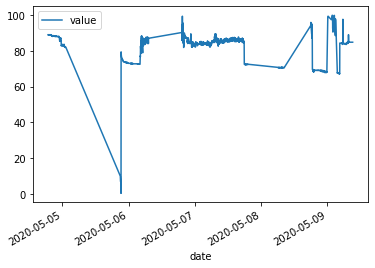

In [0]:
Data = dfSoil[['value','date']]

df = DataFrame(Data,columns=['date','value'])
df.plot(x ='date', y='value', kind = 'line')
plt.show()

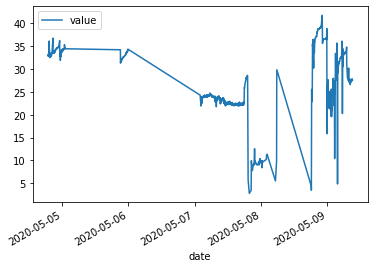

In [0]:
Data = dfTemp[['value','date']]

df = DataFrame(Data,columns=['date','value'])
df.plot(x ='date', y='value', kind = 'line')
plt.show()

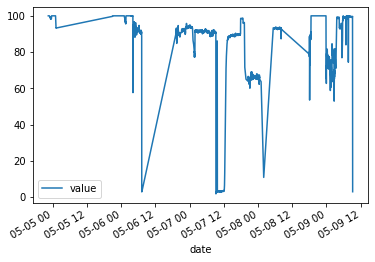

In [0]:
Data = dfLight[['value','date']]

df = DataFrame(Data,columns=['date','value'])
df.plot(x ='date', y='value', kind = 'line')
plt.show()

##Clean Data

In [0]:
dfSoil = dfSoil.set_index('date')
dfTemp = dfTemp.set_index('date')
dfLight = dfLight.set_index('date')

###Delete unnecessary data

In [0]:
dfSoil = dfSoil.drop('context',axis=1)
dfSoil = dfSoil.drop('created_at',axis=1)
dfSoil = dfSoil.drop('timestamp',axis=1)

dfTemp = dfTemp.drop('context',axis=1)
dfTemp = dfTemp.drop('created_at',axis=1)
dfTemp = dfTemp.drop('timestamp',axis=1)

dfLight = dfLight.drop('context',axis=1)
dfLight = dfLight.drop('created_at',axis=1)
dfLight = dfLight.drop('timestamp',axis=1)

###Separate Data

In [0]:
xTrain, xTest,yTrain, yTest = train_test_split(dfSoil, dfSoil['value'],shuffle=False ,train_size = 0.8)
X_val, xTest, y_val, yTest = train_test_split(xTest, yTest, test_size =0.5, shuffle=False)
print ('Tamaño Original Training:',np.shape(dfSoil))
print ('Tamaño xTrain:',np.shape(xTrain))
print ('Tamaño yTrain:',np.shape(yTrain))
print ('Muestra xTest:',np.shape(xTest))
print ('Muestra yTest:',np.shape(yTest))

Tamaño Original Training: (2100, 8)
Tamaño xTrain: (1680, 8)
Tamaño yTrain: (1680,)
Muestra xTest: (210, 8)
Muestra yTest: (210,)


##Linear Regression

###Graphs

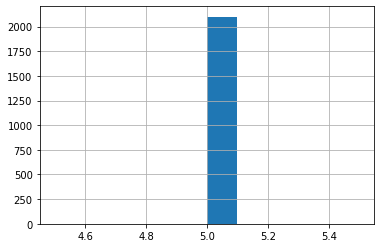

In [0]:
dfSoil['Mes'].hist()

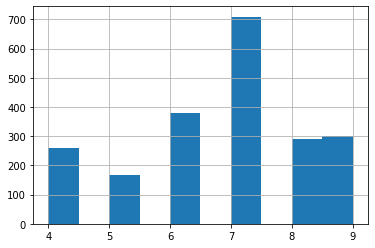

In [0]:
dfSoil['Dia'].hist()


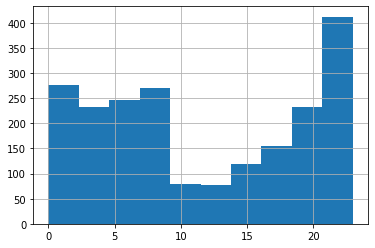

In [0]:
dfSoil['Hora'].hist()

##Linear Model

In [0]:
from sklearn import linear_model
regSoil = linear_model.LinearRegression()
regTemp = linear_model.LinearRegression()
regLight = linear_model.LinearRegression()

regSoil.fit(dfSoil[['Dia_semanal','Semana_anual','Mes','Hora','Año','Dia','dia_del_año']],dfSoil.value)
regTemp.fit(dfTemp[['Dia_semanal','Semana_anual','Mes','Hora','Año','Dia','dia_del_año']],dfTemp.value)
regLight.fit(dfLight[['Dia_semanal','Semana_anual','Mes','Hora','Año','Dia','dia_del_año']],dfLight.value)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(regSoil.coef_)
print(regTemp.coef_)
print(regLight.coef_)

[ 1.91950603e+13  3.56069636e+10  1.17187500e-02 -2.05078125e-01
  0.00000000e+00 -1.90816666e+13 -1.13393696e+11]
[ 4.48024251e+12  1.09209546e+07  4.88281250e-04  2.43164062e-01
  0.00000000e+00 -2.19058513e+12 -2.28965738e+12]
[-3.15329124e+14  1.71946407e+12  1.56250000e-01  7.81250000e-02
  0.00000000e+00  3.09348563e+14  5.98056148e+12]


In [0]:
print(regSoil.intercept_)
print(regTemp.intercept_)
print(regLight.intercept_)

89824346247007.8
294969305701669.94
-2017634254621643.0


In [0]:
#Agregar Valores
predictSoil = []
predictTemp = []
predictLight = []

for i in range(0,23):
  predictSoil.append(regSoil.predict([[tsSoil['Dia_semanal'].iloc[i] , tsSoil['Semana_anual'].iloc[i] , tsSoil['Mes'].iloc[i] , tsSoil['Hora'].iloc[i], tsSoil['Año'].iloc[i], tsSoil['Dia'].iloc[i], tsSoil['dia_del_año'].iloc[i]]]) )
  predictTemp.append(regTemp.predict([[tsTemp['Dia_semanal'].iloc[i] , tsTemp['Semana_anual'].iloc[i] , tsTemp['Mes'].iloc[i] , tsTemp['Hora'].iloc[i], tsTemp['Año'].iloc[i], tsTemp['Dia'].iloc[i], tsTemp['dia_del_año'].iloc[i]]]) )
  predictLight.append(regLight.predict([[tsLight['Dia_semanal'].iloc[i] , tsLight['Semana_anual'].iloc[i] , tsLight['Mes'].iloc[i] , tsLight['Hora'].iloc[i], tsLight['Año'].iloc[i], tsLight['Dia'].iloc[i], tsLight['dia_del_año'].iloc[i]]]) )

  print([tsSoil['Dia_semanal'].iloc[i] , tsSoil['Semana_anual'].iloc[i] , tsSoil['Mes'].iloc[i] , tsSoil['Hora'].iloc[i], tsSoil['Año'].iloc[i], tsSoil['Dia'].iloc[i], tsSoil['dia_del_año'].iloc[i]])
print(dfSoil.value)

[5, 19, 5, 10, 2020, 9, 130]
[5, 19, 5, 11, 2020, 9, 130]
[5, 19, 5, 12, 2020, 9, 130]
[5, 19, 5, 13, 2020, 9, 130]
[5, 19, 5, 14, 2020, 9, 130]
[5, 19, 5, 15, 2020, 9, 130]
[5, 19, 5, 16, 2020, 9, 130]
[5, 19, 5, 17, 2020, 9, 130]
[5, 19, 5, 18, 2020, 9, 130]
[5, 19, 5, 19, 2020, 9, 130]
[5, 19, 5, 20, 2020, 9, 130]
[5, 19, 5, 21, 2020, 9, 130]
[5, 19, 5, 22, 2020, 9, 130]
[5, 19, 5, 23, 2020, 9, 130]
[6, 19, 5, 0, 2020, 10, 131]
[6, 19, 5, 1, 2020, 10, 131]
[6, 19, 5, 2, 2020, 10, 131]
[6, 19, 5, 3, 2020, 10, 131]
[6, 19, 5, 4, 2020, 10, 131]
[6, 19, 5, 5, 2020, 10, 131]
[6, 19, 5, 6, 2020, 10, 131]
[6, 19, 5, 7, 2020, 10, 131]
[6, 19, 5, 8, 2020, 10, 131]
date
2020-05-09 09:11:56    84.94
2020-05-09 09:10:34    84.94
2020-05-09 09:07:52    84.94
2020-05-09 09:06:30    84.94
2020-05-09 09:05:08    84.94
                       ...  
2020-05-04 18:52:43    89.14
2020-05-04 18:52:33    89.14
2020-05-04 18:52:23    89.14
2020-05-04 18:52:13    89.14
2020-05-04 18:52:03    89.14
Name: val

In [0]:
predictSoil

[array([77.46875]),
 array([77.265625]),
 array([77.046875]),
 array([76.84375]),
 array([76.640625]),
 array([76.4375]),
 array([76.234375]),
 array([76.03125]),
 array([75.828125]),
 array([75.625]),
 array([75.421875]),
 array([75.203125]),
 array([75.]),
 array([74.796875]),
 array([77.859375]),
 array([77.65625]),
 array([77.453125]),
 array([77.25]),
 array([77.046875]),
 array([76.828125]),
 array([76.625]),
 array([76.421875]),
 array([76.21875])]

In [0]:
predictTemp

[array([26.0625]),
 array([26.5625]),
 array([26.8125]),
 array([27.0625]),
 array([27.25]),
 array([27.5]),
 array([27.75]),
 array([28.]),
 array([28.25]),
 array([28.5]),
 array([28.75]),
 array([29.]),
 array([29.25]),
 array([23.25]),
 array([23.4375]),
 array([23.6875]),
 array([23.9375]),
 array([24.1875]),
 array([24.4375]),
 array([24.6875]),
 array([24.9375]),
 array([25.1875]),
 array([25.4375])]

In [0]:
predictLight

[array([86.75]),
 array([87.]),
 array([87.]),
 array([87.]),
 array([87.25]),
 array([87.25]),
 array([87.25]),
 array([87.5]),
 array([87.5]),
 array([87.5]),
 array([87.75]),
 array([87.75]),
 array([87.75]),
 array([85.5]),
 array([85.5]),
 array([85.75]),
 array([85.75]),
 array([85.75]),
 array([86.]),
 array([86.]),
 array([86.]),
 array([86.25]),
 array([86.25])]

In [0]:
print(regSoil.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


##Send a Ubidots endpoint


In [0]:
#breakPoint #Esto es para evitar subir los datos a ubidots cada vez que se ejecute el programa

In [0]:
import requests
import time
BASE_URL = "https://industrial.api.ubidots.com"
REQUESTS_FUNCTIONS = {"get": requests.get, "post": requests.post}

def main(args):
    '''
    Main function - runs every time the function is executed.
    "args" is a dictionary containing both the URL params and the HTTP body (for POST requests).
    '''
    token = args.get('token', None)
    device = args.get('device', None)

    if token is None or device is None:
        print("[ERROR] Please send your Ubidots Token and device label to update in your args")
        return {"status": "error"}
    
    del args['token']
    del args['device']

    # Log the payload to the console, for debugging purposes. You may access the function's logs using
    # the option in the above header.

    print("[INFO] Payload to send: {}".format(args))

    # Use the remaining parameters as payload
    req = update_device(device, args, token)

    # Prints the request result

    print("[INFO] Request result:")
    print(req.text)

    return {"status": "Ok", "result": req.json()}

def update_device(device, payload, token):
    """
    updates a variable with a single dot
    """

    url = "{}/api/v1.6/devices/{}".format(BASE_URL, device)
    headers = {"X-Auth-Token": token, "Content-Type": "application/json"}

    req = create_request(url, headers, payload, attempts=5, request_type="post")
    
    return req

def create_request(url, headers, data, attempts, request_type):
    """
    Function to create a request to the server
    """

    request_func = REQUESTS_FUNCTIONS.get(request_type)

    kwargs = {"url": url, "headers": headers}

    if request_type == "post":
        kwargs["json"] = data

    try:
        req = request_func(**kwargs)
        print("[INFO] Request result: {}".format(req.text))
        status_code = req.status_code
        time.sleep(1)

        while status_code >= 400 and attempts < 5:
            req = request_func(**kwargs)
            print("[INFO] Request result: {}".format(req.text))
            status_code = req.status_code
            attempts += 1
            time.sleep(1)

        return req
    except Exception as e:
        print("[ERROR] There was an error with the request, details:")
        print(e)
        return None


In [0]:
#SOIL
device = "Prediction"
token = "BBFF-sCI4BMLnYxSCDgJwsR5AwQlwIqYsl6"

for i in range(0,23):
  payload = { 
      "soil-humidity-prediction":predictSoil[i][0]
      }
  update_device( device , payload , token )


[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"soil-humidity-prediction": [{"status_code": 201}]}
[INFO] Reque

In [0]:
for i in range(0,23):
  payload = { "Air Temperature-prediction":predictTemp[i][0]}
  update_device( device , payload , token )


[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_code": 201}]}
[INFO] Request result: {"air-temperature-prediction": [{"status_

In [0]:
for i in range(0,23):
  payload = { "luminosity-prediction":predictLight[i][0]}
  update_device( device , payload , token )


[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{"status_code": 201}]}
[INFO] Request result: {"luminosity-prediction": [{

##XGboost

###xgboost implementation

In [0]:

maxDepth = [5]
learningRate = [0.1] 
subSample = [1] 

model = XGBRegressor(max_depth = 5, learning_rate = 0.1, subsample =1, n_jobs = -1)
#eval_set = [(xTrain, yTrain), (xTest, yTest)]
model.fit(xTrain, yTrain, eval_set=[(X_val, y_val)],  verbose = True)

#MAPE
y_pred_proba = model.predict(xTest)
y_true = yTest
#r = mean_absolute_percentage_error(y_true,y_pred_proba)
meanSquare = mean_squared_error(y_val, model.predict(X_val))
#estimators1.append(x)


[18:11:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:69.0418
[1]	validation_0-rmse:62.2423
[2]	validation_0-rmse:56.1791
[3]	validation_0-rmse:50.6813
[4]	validation_0-rmse:45.8785
[5]	validation_0-rmse:41.4406
[6]	validation_0-rmse:37.5153
[7]	validation_0-rmse:34.0672
[8]	validation_0-rmse:31.0078
[9]	validation_0-rmse:28.3647
[10]	validation_0-rmse:25.983
[11]	validation_0-rmse:23.9731
[12]	validation_0-rmse:22.2704
[13]	validation_0-rmse:20.7446
[14]	validation_0-rmse:19.4784
[15]	validation_0-rmse:18.4038
[16]	validation_0-rmse:17.4808
[17]	validation_0-rmse:16.7359
[18]	validation_0-rmse:16.1264
[19]	validation_0-rmse:15.6035
[20]	validation_0-rmse:15.1726
[21]	validation_0-rmse:14.8418
[22]	validation_0-rmse:14.5689
[23]	validation_0-rmse:14.364
[24]	validation_0-rmse:14.1873
[25]	validation_0-rmse:14.0615
[26]	validation_0-rmse:13.9628
[27]	validation_0-rmse:13.901
[28]	validation_0-

In [0]:
print ((xTrain))
print ((yTrain))
print ((xTest))
print ((yTest))

                     value  Dia_semanal  Semana_anual  ...   Año  Dia  dia_del_año
date                                                   ...                        
2020-05-09 09:11:56  84.94            5            19  ...  2020    9          130
2020-05-09 09:10:34  84.94            5            19  ...  2020    9          130
2020-05-09 09:07:52  84.94            5            19  ...  2020    9          130
2020-05-09 09:06:30  84.94            5            19  ...  2020    9          130
2020-05-09 09:05:08  84.94            5            19  ...  2020    9          130
...                    ...          ...           ...  ...   ...  ...          ...
2020-05-05 23:59:46  73.09            1            19  ...  2020    5          126
2020-05-05 23:58:15  73.09            1            19  ...  2020    5          126
2020-05-05 23:56:42  73.09            1            19  ...  2020    5          126
2020-05-05 23:55:08  73.09            1            19  ...  2020    5          126
2020

#Testing

In [0]:

timestamp = 1588889538
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

AttributeError: ignored

In [0]:
dt_object = datetime.fromtimestamp(dfSoil['timestamp'])

In [0]:
hello = pd.to_datetime(dfSoil['timestamp']).apply(lambda x: x.date())
dfSoil['date'] = pd.to_datetime(dfSoil['timestamp'], unit='s')


In [0]:
dfTemp.hist()

In [0]:
dfSoil['Dia'].hist()

In [0]:
tsLight

In [0]:
dfLight

In [0]:
https://industrial.api.ubidots.com/api/v1.6/devices/timestamp/{variable_label}/values/